In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
"""
Linear Regression Example with scikit-learn

We are fitting a simple linear regression model using one feature (x) and one target (y).

Key concepts:
-------------
1. Samples vs Features:
   - Each row of X represents one "sample" (an observation).
   - Each column of X represents one "feature" (a variable describing the sample).
   - In this dataset, we have 5 samples and 1 feature.
     -> Shape of X = (5, 1)
   - Samples = row, features = columns in a row

2. Why reshape x to (-1,1)?
   - np.array([1,2,3,4,5]) by default has shape (5,) -> a 1D array.
   - scikit-learn expects input features X to be 2D: (n_samples, n_features).
   - .reshape(-1,1) converts (5,) into (5,1):
         [[1],
          [2],
          [3],
          [4],
          [5]]
     Here:
     - 5 rows = 5 samples
     - 1 column = 1 feature
     

3. Formula for -1 in reshape:
       arr = np.array([1,2,3,4,5,6])   # 6 elements
       arr.reshape(-1, 2) -> (6 / 2) = 3 rows, so shape = (3,2)
       arr.reshape(2, -1) -> (6 / 2) = 3 columns, so shape = (2,3)

   In our case:
       total_elements = 5
       reshape(-1,1) => rows = 5 / 1 = 5
       Final shape = (5,1)
       
4. Why y is not reshaped:
   - Target (y) should be a 1D array with shape (n_samples,).
   - y = np.array([3,4,2,5,6]) has shape (5,) which is correct.
   - If we reshaped y into (5,1), sklearn would interpret it as a multi-output regression problem.
   - Since we have only ONE target per sample, we keep y as 1D.

Summary:
--------
- X (features) must be 2D: shape = (n_samples, n_features)
- y (target) must be 1D: shape = (n_samples,)
"""

'\nLinear Regression Example with scikit-learn\n\nWe are fitting a simple linear regression model using one feature (x) and one target (y).\n\nKey concepts:\n-------------\n1. Samples vs Features:\n   - Each row of X represents one "sample" (an observation).\n   - Each column of X represents one "feature" (a variable describing the sample).\n   - In this dataset, we have 5 samples and 1 feature.\n     -> Shape of X = (5, 1)\n   - Samples = row, features = columns in a row\n\n2. Why reshape x to (-1,1)?\n   - np.array([1,2,3,4,5]) by default has shape (5,) -> a 1D array.\n   - scikit-learn expects input features X to be 2D: (n_samples, n_features).\n   - .reshape(-1,1) converts (5,) into (5,1):\n         [[1],\n          [2],\n          [3],\n          [4],\n          [5]]\n     Here:\n     - 5 rows = 5 samples\n     - 1 column = 1 feature\n     \n\n3. Formula for -1 in reshape:\n       arr = np.array([1,2,3,4,5,6])   # 6 elements\n       arr.reshape(-1, 2) -> (6 / 2) = 3 rows, so shape

In [15]:
# Input feature (independent variable)
x = np.array([1,2,3,4,5]).reshape(-1,1)  # Shape: (5,1) -> 5 samples, 1 feature

# Target variable (dependent variable)
y = np.array([3,4,2,5,6])                # Shape: (5,)  -> 5 target values

# Train linear regression model
model = LinearRegression()
model.fit(x, y)

print("Intercept (B0):", model.intercept_)
print("Slope/Gradient (B1):", model.coef_)

Intercept (B0): 1.9000000000000004
Slope/Gradient (B1): [0.7]


In [16]:
"""
Behind the scenes: What happens inside .fit()

Sklearn's LinearRegression().fit(X, y) is basically solving the formula for 
a straight line:

    ŷ = B0 + B1*x

Where:
    B0 = intercept (where line cuts y-axis)
    B1 = slope (how steep the line is)

How sklearn calculates B0 and B1?
--------------------------------
Step 1: Calculate mean of X and Y
    x̄ = Σxi / n
    ȳ = Σyi / n

Step 2: Calculate slope (B1)
    Formula: B1 = Σ(xi - x̄)(yi - ȳ) / Σ(xi - x̄)²

Example with our data:
    x̄ = (1+2+3+4+5)/5 = 3
    ȳ = (3+4+2+5+6)/5 = 4

    Numerator = (1-3)(3-4) + (2-3)(4-4) + (3-3)(2-4) + (4-3)(5-4) + (5-3)(6-4)
              = 2 + 0 + 0 + 1 + 4 = 7
    Denominator = (1-3)² + (2-3)² + (3-3)² + (4-3)² + (5-3)²
                = 4 + 1 + 0 + 1 + 4 = 10

    So, B1 = 7 / 10 = 0.7

Step 3: Calculate intercept (B0)
    Formula: B0 = ȳ - B1 * x̄
    B0 = 4 - (0.7 * 3) = 1.9

➡ Final line equation learned by model:
    ŷ = 1.9 + 0.7x

So whenever we call model.predict(), sklearn uses this learned formula.
"""

"\nBehind the scenes: What happens inside .fit()\n\nSklearn's LinearRegression().fit(X, y) is basically solving the formula for \na straight line:\n\n    ŷ = B0 + B1*x\n\nWhere:\n    B0 = intercept (where line cuts y-axis)\n    B1 = slope (how steep the line is)\n\nHow sklearn calculates B0 and B1?\n--------------------------------\nStep 1: Calculate mean of X and Y\n    x̄ = Σxi / n\n    ȳ = Σyi / n\n\nStep 2: Calculate slope (B1)\n    Formula: B1 = Σ(xi - x̄)(yi - ȳ) / Σ(xi - x̄)²\n\nExample with our data:\n    x̄ = (1+2+3+4+5)/5 = 3\n    ȳ = (3+4+2+5+6)/5 = 4\n\n    Numerator = (1-3)(3-4) + (2-3)(4-4) + (3-3)(2-4) + (4-3)(5-4) + (5-3)(6-4)\n              = 2 + 0 + 0 + 1 + 4 = 7\n    Denominator = (1-3)² + (2-3)² + (3-3)² + (4-3)² + (5-3)²\n                = 4 + 1 + 0 + 1 + 4 = 10\n\n    So, B1 = 7 / 10 = 0.7\n\nStep 3: Calculate intercept (B0)\n    Formula: B0 = ȳ - B1 * x̄\n    B0 = 4 - (0.7 * 3) = 1.9\n\n➡ Final line equation learned by model:\n    ŷ = 1.9 + 0.7x\n\nSo whenever we

Predicted Values of model: [2.6 3.3 4.  4.7 5.4]


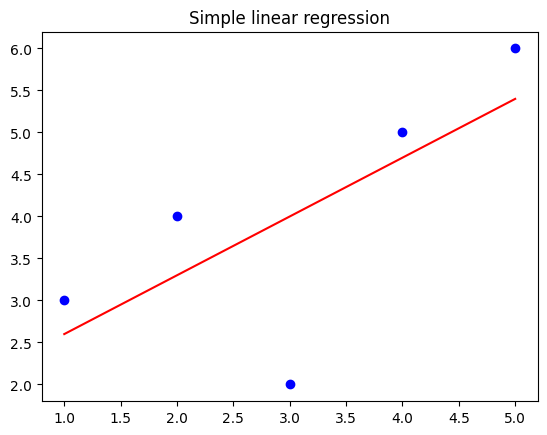

In [17]:
# Prediction
y_pred = model.predict(x)
print("Predicted Values of model:",y_pred)

# Plotting
# Scatter plot -> shows the data points
plt.scatter(x,y,color='blue')

# Line plot -> shows the model's predicted regression line
plt.plot(x,y_pred, color='red')

plt.title("Simple linear regression")
plt.show()

In [18]:
# Test prediction
print("Slope (B1):", model.coef_)      # Should be 0.7
print("Intercept (B0):", model.intercept_)  # Should be 1.9
print("Prediction for x=6:", model.predict([[6]]))  # ŷ = 1.9 + 0.7*6 = 6.1

Slope (B1): [0.7]
Intercept (B0): 1.9000000000000004
Prediction for x=6: [6.1]


In [19]:
"""
Behind the Scenes of Prediction & Error Calculation
---------------------------------------------------

1. Prediction:
   Each predicted value is calculated using:
       ŷ = B0 + B1*x
   where:
       ŷ = predicted y
       B0 = intercept
       B1 = slope/gradient

2. Error (residuals):
    Errors = Actual - Predicted
           = [3-2.6, 4-3.3, 2-4.0, 5-4.7, 6-5.4]
           = [0.4, 0.7, -2.0, 0.3, 0.6]

3. Mean Squared Error (MSE):  (takes squares of errors then take average)
   MSE = (1/n) * Σ (y_actual - ŷ_predicted)^2
   Squares = [0.4², 0.7², (-2.0)², 0.3², 0.6²]
           = [0.16, 0.49, 4.00, 0.09, 0.36] --> Sum = 5.10
           MSE = 5.10 / 5 = 1.02

4. Root Mean Squared Error (RMSE):
   RMSE = √MSE (square root of MSE)

5. R² Score (goodness of fit):
   R² = 1 - (MSE numerator) / Σ (y_actual - y_mean)^2)
   Find mean of y --> y = (3+4+2+5+6) / 5 = 20/5 = 4
   Calculate numerator (same as MSE numerator)
   Calculate denominator: (y_actual - y_mean)2 = (3-4)2 + (4-4)2 + (2-4)2 + (5-4)2 + (6-4)2 = 1+0+4+1+4 = 10
   R² = 1 - (5.10/10) = 1 - 0.51 = 0.49
   
   - If R² ≈ 1 → Predictions are very close to actual values.
   - If R² ≈ 0 → Model is poor at predicting.

So when we call:
    model.predict(x)
It internally applies the line equation (ŷ = B0 + B1*x) to every input
and gives predictions. Then we compare these predictions with the
original 'y' values to measure accuracy using MSE, RMSE, and R².
"""

"\nBehind the Scenes of Prediction & Error Calculation\n---------------------------------------------------\n\n1. Prediction:\n   Each predicted value is calculated using:\n       ŷ = B0 + B1*x\n   where:\n       ŷ = predicted y\n       B0 = intercept\n       B1 = slope/gradient\n\n2. Error (residuals):\n    Errors = Actual - Predicted\n           = [3-2.6, 4-3.3, 2-4.0, 5-4.7, 6-5.4]\n           = [0.4, 0.7, -2.0, 0.3, 0.6]\n\n3. Mean Squared Error (MSE):  (takes squares of errors then take average)\n   MSE = (1/n) * Σ (y_actual - ŷ_predicted)^2\n   Squares = [0.4², 0.7², (-2.0)², 0.3², 0.6²]\n           = [0.16, 0.49, 4.00, 0.09, 0.36] --> Sum = 5.10\n           MSE = 5.10 / 5 = 1.02\n\n4. Root Mean Squared Error (RMSE):\n   RMSE = √MSE (square root of MSE)\n\n5. R² Score (goodness of fit):\n   R² = 1 - (MSE numerator) / Σ (y_actual - y_mean)^2)\n   Find mean of y --> y = (3+4+2+5+6) / 5 = 20/5 = 4\n   Calculate numerator (same as MSE numerator)\n   Calculate denominator: (y_actual -

In [20]:
# Calculate R² score (Coefficient of Determination)
# Compares model's predicted y (from x) with actual y values
# This tells us how well the model explains the variance in y
# R² = 1 means perfect fit, closer to 0 means poor fit
r2 = model.score(x,y)
print("R² Score (model accuracy):", r2)

R² Score (model accuracy): 0.4899999999999999


## Testing Model with New Input

Predicated values of model:  [2.6 4.7 4.  4.  5.4]


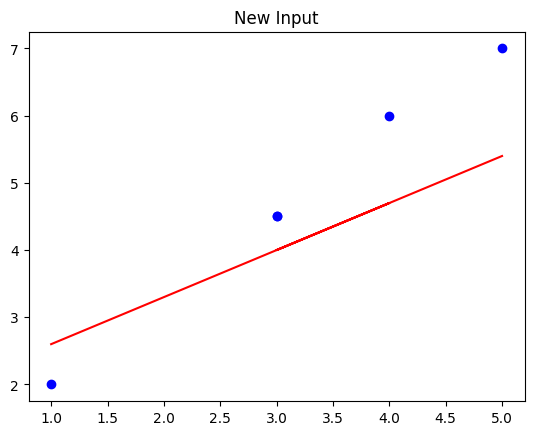

In [21]:
# Create new x values for testing/prediction
x_new = np.array([1,4,3,3,5]).reshape(-1,1)

# Actual output values (y) corresponding to the new inputs (x_new) for comparison
y_new = np.array([2,6,4.5,4.5,7])

# Predict y values for the new x inputs
y_pred_new = model.predict(x_new)
print("Predicated values of model: ",y_pred_new)

# Plotting
# Scatter plot -> shows the data points
plt.scatter(x_new,y_new,color='blue')

# Line plot -> shows the model's predicted regression line
plt.plot(x_new,y_pred_new, color='red')

plt.title("New Input")
plt.show()

In [22]:
# Compares model's predicted y (from x_new) with actual y_new values
r2_new = model.score(x_new,y_new)
print("R² Score:", r2_new)

R² Score: 0.6426573426573424
